#### Network plot
A network is a set of objects (called nodes or vertices) that are connected to each other. The connections between the nodes are called edges or links. 

If the edges in a network are directed, i.e., pointing in only one direction, the network is called a directed network. When drawing a directed network, the edges are typically drawn as arrows indicating the direction. 

If all edges are bidirectional, or undirectional, the network is an undirected network.

#### Pair plot
A pair plot depicts pairwise relationships between all the variables in a dataset in a matrix format. Each row and column in the matrix represents a variable in the dataset. 

The plots present in the diagonal are univariate plots as the variables are compared with themselves and the others are bivariate scatter plots

#### Joint plot
A joint plot is a combination of two univariate and one bivariate plots. The bivariate plot (in the center) helps in analysing the relationship between two variables. The univariate plot describes the distribution of data in each variable as a marginal plot.

A joint plot is used to quickly visualise and analyse the relationship between two variables and examine their distributions on the same plot

#### dist plot
A dist plot or distribution plot, depicts the variation in a data distribution. It represents the overall distribution of continuous data variables.

In [1]:
print("importing libraries")
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
print("libraries imported")

importing libraries
libraries imported


In [2]:
data = pd.read_csv("Cars93.csv")
columns = ["Manufacturer","Model","Type","Price","MPG.city","MPG.highway","Horsepower","Rear.seat.room","Passengers"]
cars_data = data[columns]
cars_data.head()

,Manufacturer,Model,Type,Price,MPG.city,MPG.highway,Horsepower,Rear.seat.room,Passengers
0,Acura,Integra,Small,15.9,25,31,140,26.5,5
1,Acura,Legend,Midsize,33.9,18,25,200,30.0,5
2,Audi,90,Compact,29.1,20,26,172,28.0,5
3,Audi,100,Midsize,37.7,19,26,172,31.0,6
4,BMW,535i,Midsize,30.0,22,30,208,27.0,4


### Boxplot 1 - single box plot using pandas plot function

<AxesSubplot:>

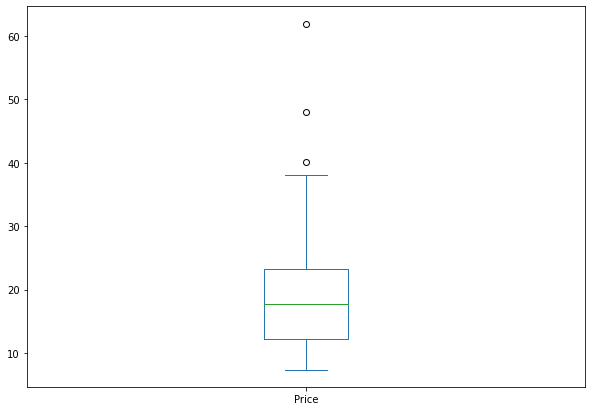

In [3]:
cars_data["Price"].plot(kind="box",figsize=(10,7))

### Box plots using sub plots

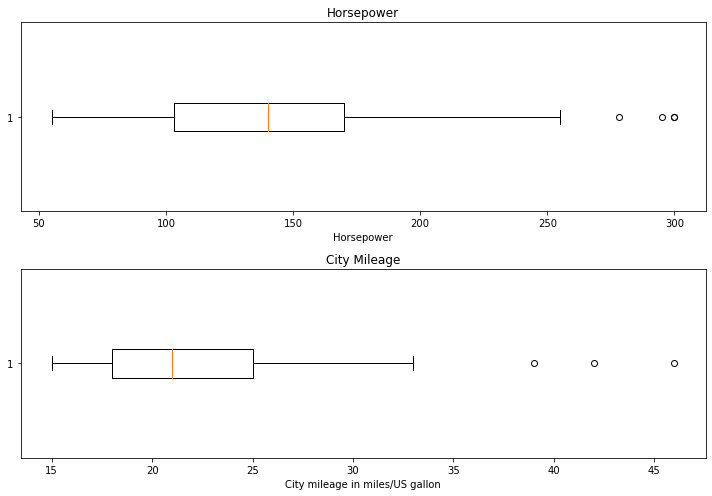

In [4]:
fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figwidth(10) #setting width of plot
fig.set_figheight(7) #setting height of plot

ax1.boxplot(cars_data["Horsepower"],vert=False)
ax2.boxplot(cars_data["MPG.city"],vert=False)

ax1.set_title("Horsepower")
ax1.set_xlabel("Horsepower")
ax2.set_title("City Mileage")
ax2.set_xlabel("City mileage in miles/US gallon")

fig.tight_layout()

### Multiple box plots

Text(0.5, 1.0, 'Van')

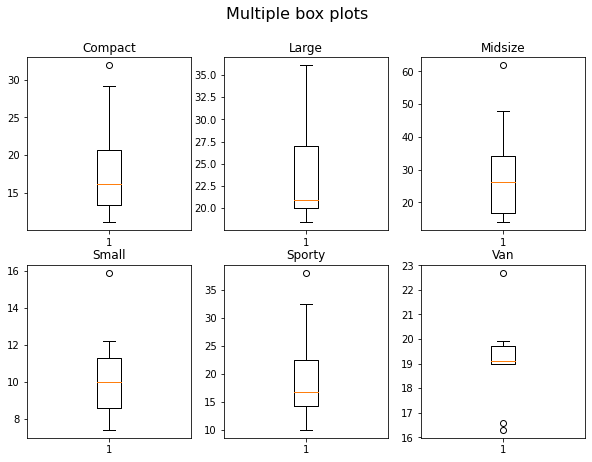

In [5]:
fig, ax = plt.subplots(2,3)
fig.set_figwidth(10)
fig.set_figheight(7)

#title
fig.suptitle("Multiple box plots",fontsize=16)

#Accessing each partition[m][n] and providing the plot and its title
ax[0][0].boxplot(cars_data["Price"][cars_data["Type"]=="Compact"])
ax[0][0].set_title("Compact")
ax[0][1].boxplot(cars_data["Price"][cars_data["Type"]=="Large"])
ax[0][1].set_title("Large")
ax[0][2].boxplot(cars_data["Price"][cars_data["Type"]=="Midsize"])
ax[0][2].set_title("Midsize")
ax[1][0].boxplot(cars_data["Price"][cars_data["Type"]=="Small"])
ax[1][0].set_title("Small")
ax[1][1].boxplot(cars_data["Price"][cars_data["Type"]=="Sporty"])
ax[1][1].set_title("Sporty")
ax[1][2].boxplot(cars_data["Price"][cars_data["Type"]=="Van"])
ax[1][2].set_title("Van")

### Multiple box plots in same canvas

Text(0.5, 1, 'Prices of car according to car type')

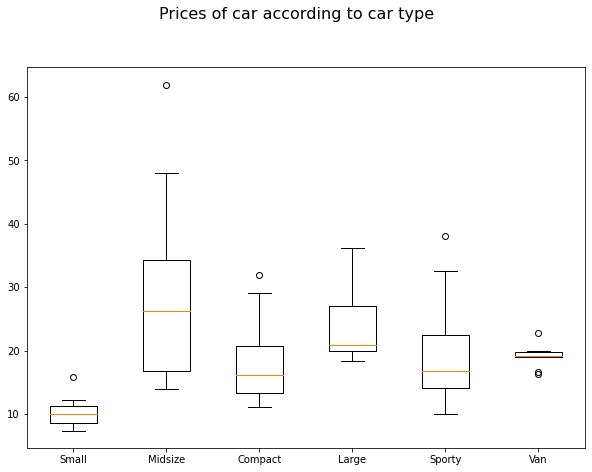

In [6]:
#finding the list of unique values of car type
car_type_list = cars_data["Type"].unique()

#setting the width and height of the plot
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)

#creating a box plot for every unique car type
ax.boxplot([cars_data["Price"][cars_data["Type"]==k] for k in car_type_list])

#To set the position for each plot in the iteration
plt.xticks([i for i in range(1,len(car_type_list)+1)], [k for k in car_type_list])

#Super title
plt.suptitle("Prices of car according to car type",fontsize=16,y=1
            )

### Multiple box plots with same axes

Text(0.5, 1.0, 'Van')

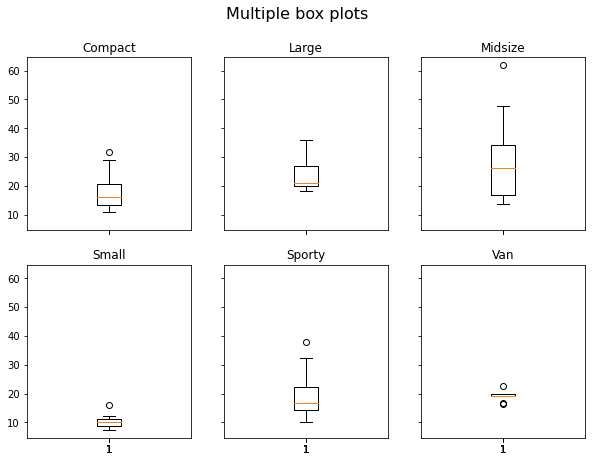

In [7]:
fig, ax = plt.subplots(2,3,sharey=True,sharex=True)
fig.set_figwidth(10)
fig.set_figheight(7)

#title
fig.suptitle("Multiple box plots",fontsize=16)

#Accessing each partition[m][n] and providing the plot and its title
ax[0][0].boxplot(cars_data["Price"][cars_data["Type"]=="Compact"])
ax[0][0].set_title("Compact")
ax[0][1].boxplot(cars_data["Price"][cars_data["Type"]=="Large"])
ax[0][1].set_title("Large")
ax[0][2].boxplot(cars_data["Price"][cars_data["Type"]=="Midsize"])
ax[0][2].set_title("Midsize")
ax[1][0].boxplot(cars_data["Price"][cars_data["Type"]=="Small"])
ax[1][0].set_title("Small")
ax[1][1].boxplot(cars_data["Price"][cars_data["Type"]=="Sporty"])
ax[1][1].set_title("Sporty")
ax[1][2].boxplot(cars_data["Price"][cars_data["Type"]=="Van"])
ax[1][2].set_title("Van")

### Scatter plot by pandas plot function

Text(0.5, 1.0, 'Horsepower vs MPG.city')

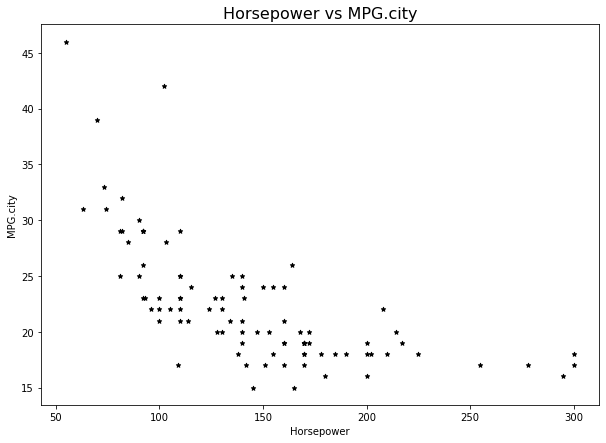

In [8]:
ax = cars_data.plot(["Horsepower"],["MPG.city"],kind="scatter",color="black",marker="*",figsize=(10,7))

ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG.city")
ax.set_title("Horsepower vs MPG.city",fontsize=16) 

### Scatter plot based on category"

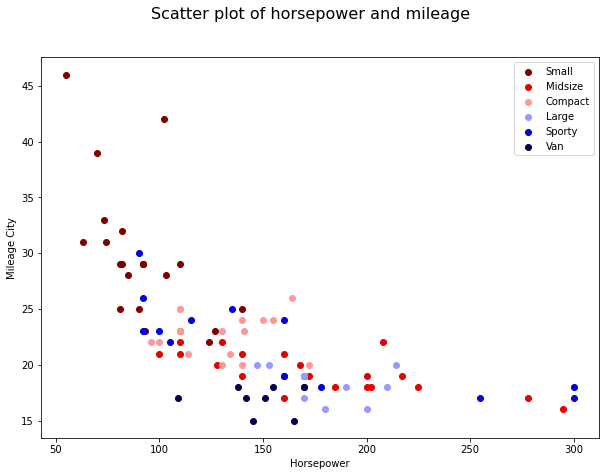

In [9]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

colors = cm.seismic_r(np.linspace(0,1,len(car_type_list))) #we extract the colours using the seismic_r method, r -- reverse

for car_type,c in zip(car_type_list,colors): #for every car type in the car_type_list we plot all points in the scatter plot
    x=cars_data[cars_data["Type"]==car_type]["Horsepower"]
    y=cars_data[cars_data["Type"]==car_type]["MPG.city"]
    plt.scatter(x,y,color=c,label=car_type)
    
plt.suptitle("Scatter plot of horsepower and mileage",fontsize=16)
plt.xlabel("Horsepower")
plt.ylabel("Mileage City")
plt.legend()

### LIne chart using pandas plot function

Text(0.5, 1.0, 'Mileage vs Horsepower')

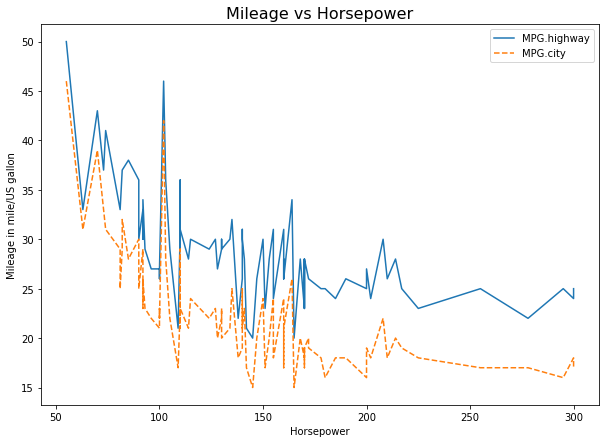

In [10]:
cars_data = cars_data.sort_values(by="Horsepower")

fig, ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(7)

cars_data.plot(ax=ax, x="Horsepower", y="MPG.highway", kind="line",)
cars_data.plot(ax=ax, x="Horsepower", y="MPG.city", kind="line", linestyle='--')

ax.set_ylabel("Mileage in mile/US gallon")
ax.set_title("Mileage vs Horsepower",fontsize=16)

### line chart using plt

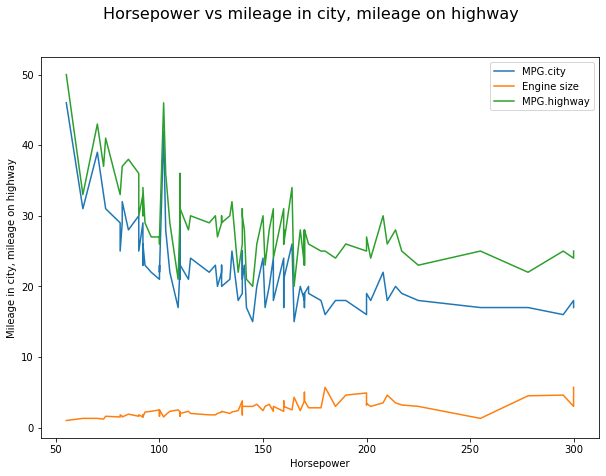

In [11]:
carsdata = data.sort_values(by="Horsepower")

fig =plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

plt.plot(carsdata["Horsepower"],carsdata["MPG.city"], label="MPG.city")
plt.plot(carsdata["Horsepower"],carsdata["EngineSize"], label="Engine size")
plt.plot(carsdata["Horsepower"],carsdata["MPG.highway"], label="MPG.highway")

plt.suptitle("Horsepower vs mileage in city, mileage on highway", fontsize=16)
plt.xlabel("Horsepower")
plt.ylabel("Mileage in city, mileage on highway")
plt.legend()

### Vertical bar chart

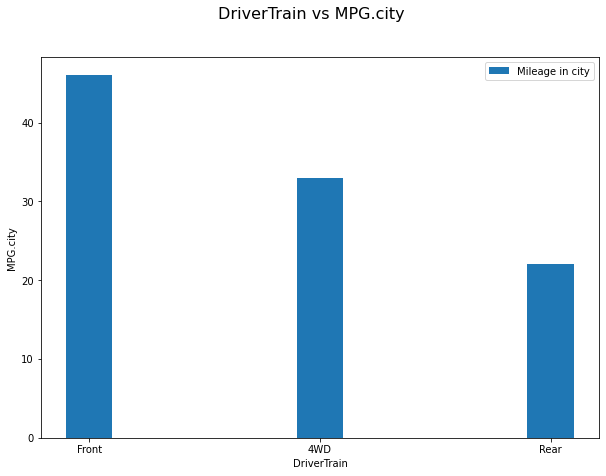

In [12]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

plt.bar(carsdata["DriveTrain"],carsdata["MPG.city"],width=0.2,label="Mileage in city")

plt.suptitle("DriverTrain vs MPG.city",fontsize=16)
plt.xlabel("DriverTrain")
plt.ylabel("MPG.city")

plt.legend()

### Horizontal bar chart

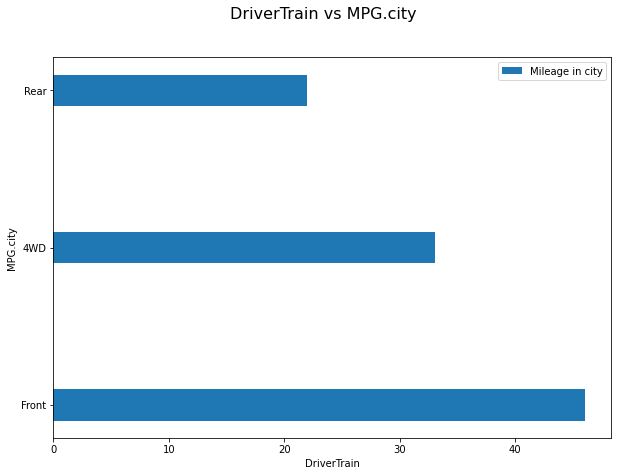

In [13]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

plt.barh(carsdata["DriveTrain"],carsdata["MPG.city"],height=0.2,label="Mileage in city")

plt.suptitle("DriverTrain vs MPG.city",fontsize=16)
plt.xlabel("DriverTrain")
plt.ylabel("MPG.city")

plt.legend()

### Stacked bar chart

In [14]:
carsdata["Passengers"].unique()

array([4, 5, 6, 7, 8, 2], dtype=int64)

In [15]:
carsdata["Type"].unique()

array(['Small', 'Sporty', 'Compact', 'Midsize', 'Van', 'Large'],
      dtype=object)

In [16]:
grouped_data = carsdata[["Passengers","Type"]].groupby(by = ["Passengers","Type"]).size().unstack().reset_index()

<AxesSubplot:xlabel='Passengers'>

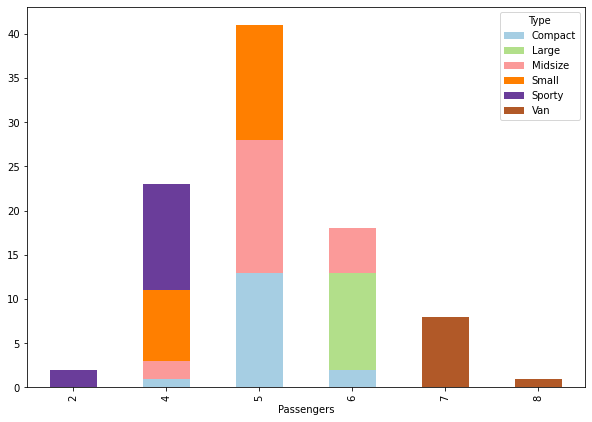

In [17]:
grouped_data.plot(x="Passengers",kind="bar",stacked=True,colormap=cm.Paired,figsize=(10,7))

### Error bar chart

<AxesSubplot:xlabel='Passengers'>

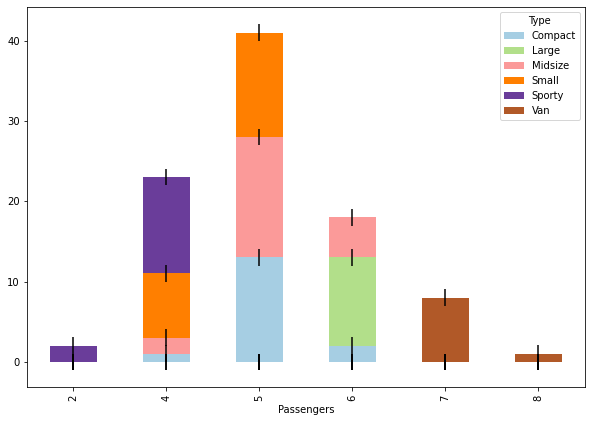

In [18]:
grouped_data.plot(x="Passengers",kind="bar",stacked=True,colormap=cm.Paired,figsize=(10,7),yerr=np.std(carsdata["Passengers"]))

### Grouped bar chart

In [19]:
carsdata["DriveTrain"].unique()

array(['Front', '4WD', 'Rear'], dtype=object)

In [20]:
grouped_cars = carsdata[["MPG.city","MPG.highway","RPM","DriveTrain"]].groupby(by="DriveTrain").mean().T
grouped_cars

DriveTrain,4WD,Front,Rear
MPG.city,20.5,23.522388,18.6875
MPG.highway,25.8,30.238806,26.3125
RPM,5120.0,5374.626866,4987.5000


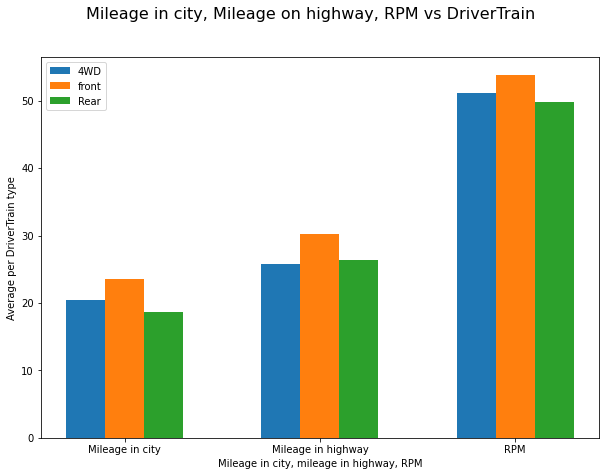

In [21]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

grouped_cars.loc['RPM']/=100
width = 0.2
ind = list(range(len(carsdata["DriveTrain"].unique())))

plt.bar([i for i in ind], height=grouped_cars["4WD"],label="4WD",width=width)
plt.bar([i+width for i in ind], height=grouped_cars["Front"],width=width,bottom=0,label="front")
plt.bar([i+width*2 for i in ind], height=grouped_cars["Rear"],label="Rear",width=width,bottom=0)

plt.suptitle("Mileage in city, Mileage on highway, RPM vs DriverTrain",fontsize=16)
plt.xlabel("Mileage in city, mileage in highway, RPM")
plt.ylabel("Average per DriverTrain type")
plt.xticks([i+width for i in ind],["Mileage in city","Mileage in highway","RPM"])
plt.legend()

### Pie chart

In [22]:
carsdata["Cylinders"].unique()

array(['3', '4', '5', '6', '8', 'rotary'], dtype=object)

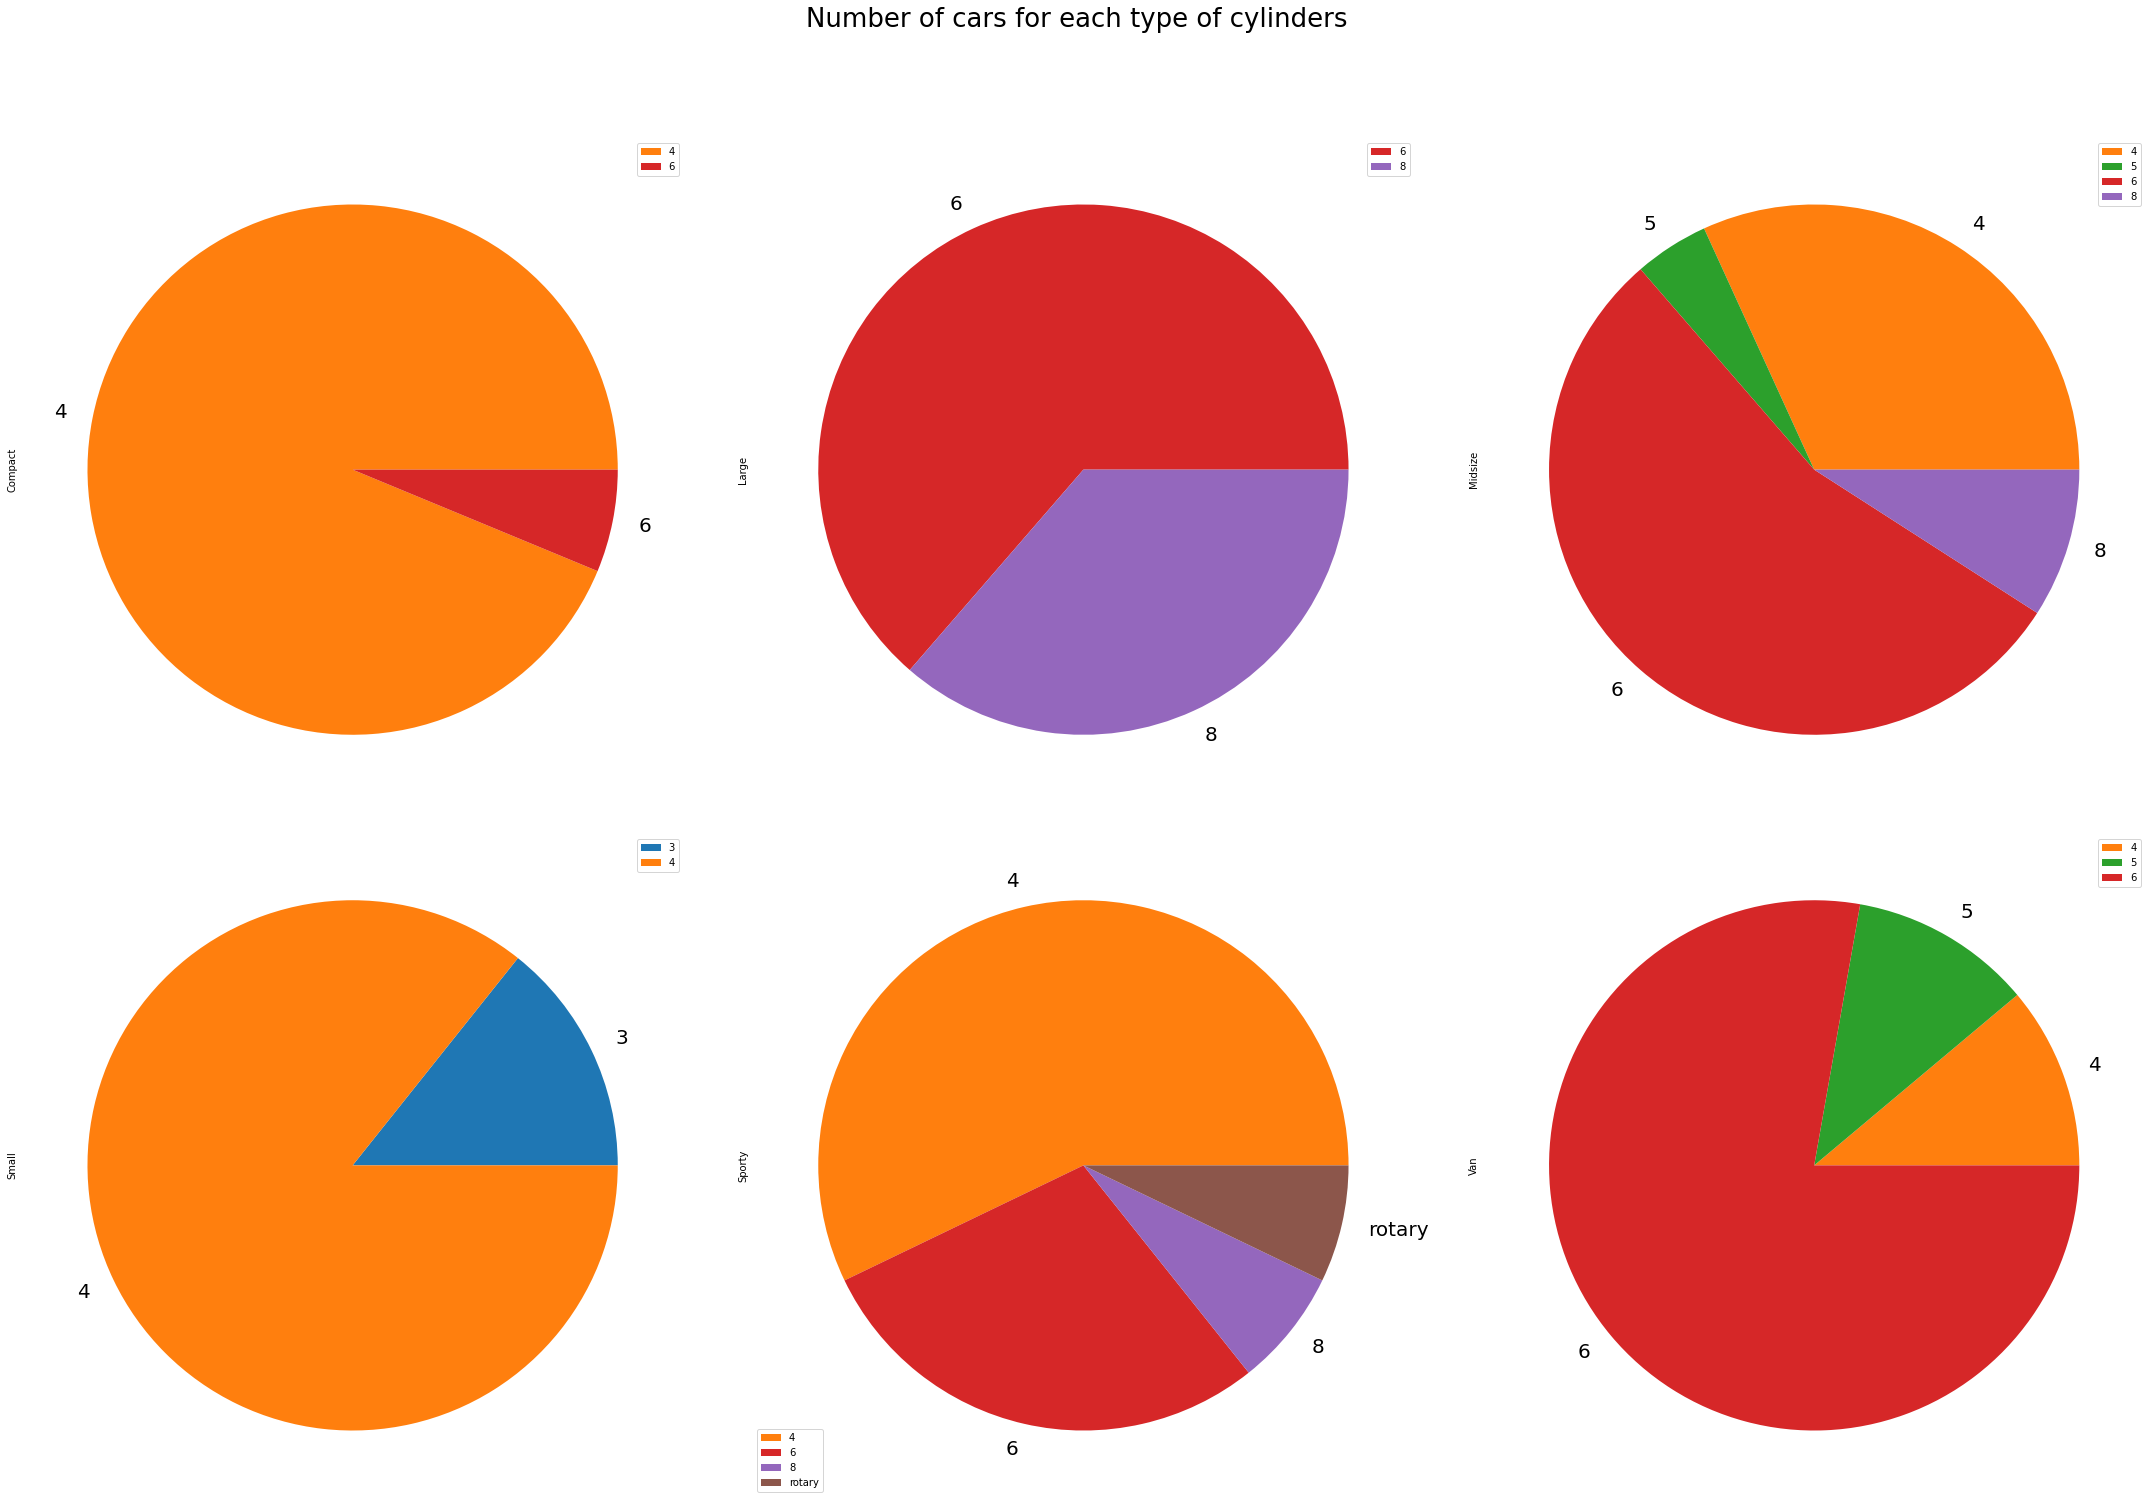

In [23]:
grouped_data = carsdata[["Cylinders","Type"]].groupby(by = ["Cylinders","Type"]).size().unstack()
fig,ax = plt.subplots(2,3,figsize=(15,10))
grouped_data.plot.pie(ax=ax,subplots=True,fontsize=20)
fig.suptitle("Number of cars for each type of cylinders",fontsize=26,x=1,y=2.1)
fig.tight_layout(rect=[0,0,2,2])

### Histogram

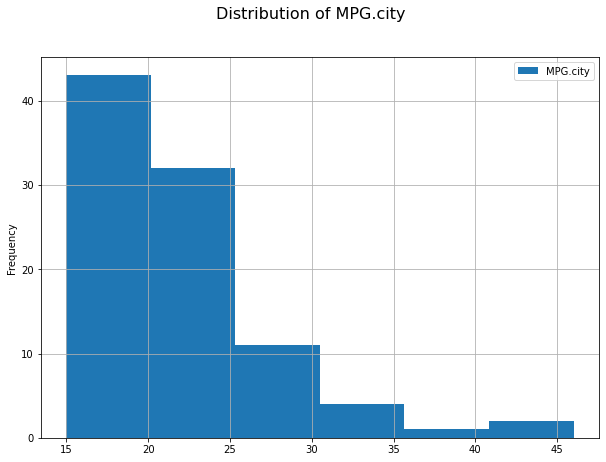

In [24]:
carsdata["MPG.city"].plot(kind="hist",grid=True,figsize=(10,7),bins=6)
plt.suptitle("Distribution of MPG.city",fontsize=16)
plt.legend()

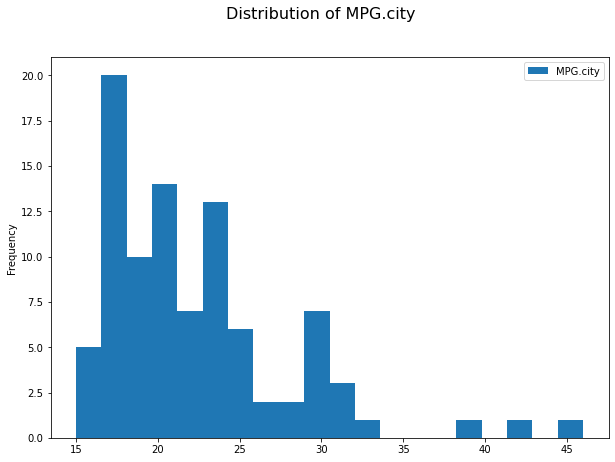

In [25]:
#without grid

carsdata["MPG.city"].plot(kind="hist",figsize=(10,7),bins=20)
plt.suptitle("Distribution of MPG.city",fontsize=16)
plt.legend()

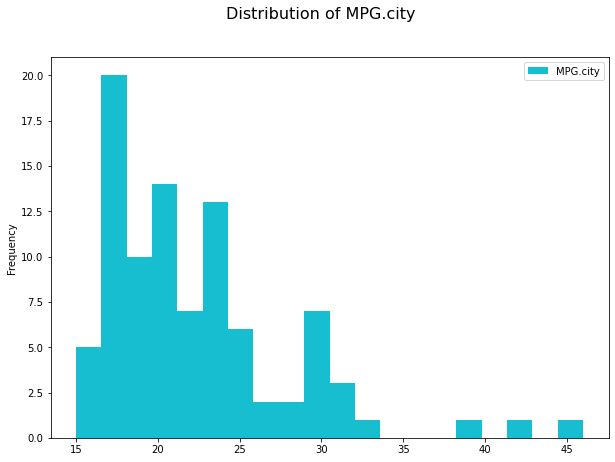

In [26]:
#color of histogram can be changed using the color parameter. It can take values between C(0-9).

carsdata["MPG.city"].plot(kind="hist",figsize=(10,7),bins=20,color="C9")
plt.suptitle("Distribution of MPG.city",fontsize=16)
plt.legend()

(14.0, 50.0)

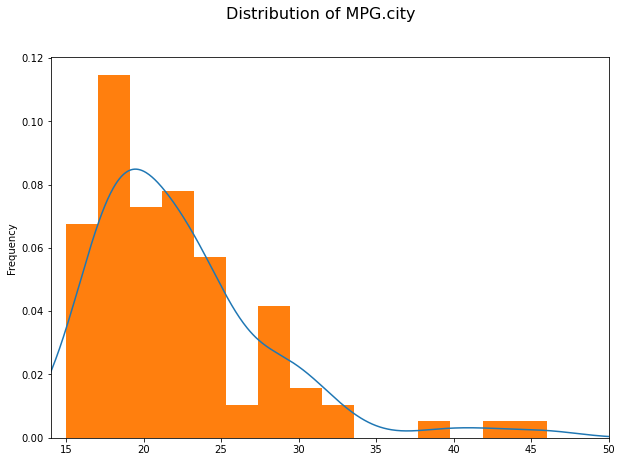

In [27]:
#for density line, use kind="density"
carsdata["MPG.city"].plot(kind="density")
carsdata["MPG.city"].plot(kind="hist",figsize=(10,7),bins=15,density=True)
plt.suptitle("Distribution of MPG.city",fontsize=16)
plt.xlim(14,50)

### Choropleth maps

In [28]:
df_world = pd.read_csv("volcano_data_2010.csv")
df_world.head()

,Year,Month,Day,TSU,EQ,Name,Location,Country,Latitude,Longitude,...,TOTAL_DEATHS,TOTAL_DEATHS_DESCRIPTION,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION
0,2010,1,NaN,NaN,NaN,Tungurahua,Ecuador,Ecuador,-1.467,-78.442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,2010,3,31.0,NaN,NaN,Eyjafjallajokull,Iceland-S,Iceland,63.630,-19.620,...,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,5,27.0,NaN,NaN,Pacaya,Guatemala,Guatemala,14.381,-90.601,...,1.0,1.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0,1.0
3,2010,5,29.0,TSU,EQ,Sarigan,Mariana Is-C Pacific,United States,16.708,145.780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010,8,6.0,NaN,NaN,Karangetang [Api Siau],Sangihe Is-Indonesia,Indonesia,2.780,125.480,...,4.0,1.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0


In [29]:
df_world["Country"].unique()

array(['Ecuador', 'Iceland', 'Guatemala', 'United States', 'Indonesia',
       'Japan', 'Philippines', 'Chile', 'Eritrea', 'Russia', 'Peru',
       'New Zealand', 'Cape Verde', 'Papua New Guinea', 'Italy',
       'Vanuatu'], dtype=object)

In [30]:
df_countries = df_world['Year'].groupby(df_world['Country']).count()
df_countries = df_countries.reset_index()
df_countries.rename(columns={'Year':'count'},inplace=True)
df_countries = df_countries.sort_values('count',ascending=False)
df_countries.reset_index(drop=True,inplace=True)
df_countries

,Country,count
0,Indonesia,26
1,United States,7
2,Japan,5
3,Ecuador,3
4,Papua New Guinea,3
5,Philippines,3
6,Chile,2
7,Guatemala,2
8,Iceland,2
9,Italy,2


In [31]:
#Choropleth map in a utility of plotly, therefore we import the specific libraries

import plotly.offline as po
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
po.init_notebook_mode(connected=True)

In [32]:
#Since the choropleth maps receive input as dictionary we make the following modifications to df

data = dict(type='choropleth',
           locations=df_countries['Country'],
           locationmode = 'country names',z=df_countries['count'],
           text=df_countries['Country'],colorbar=dict(title='Frequency'),
           colorscale=[[0,"rgb(146,43,33)"],[0.35,"rgb(176,58,46)"],
                       [0.5,"rgb(192,57,43)"],[0.6,"rgb(203,67,53)"],
                      [0.7,"rgb(231,76,60)"],[1,"rgb(205,97,85)"]],
                      autocolorscale=False,
                      reversescale=False,
                      marker=dict(line=dict(color='rgb(180,180,180)',width=0.5)))

In [33]:
layout = dict(title = 'Volcanoes distribution',
             geo=dict(showframe=False,projection={'type':'mercator'},showlakes=False,
                     showcoastlines=True,showland=True,
                     landcolor="rgb(229,229,229)"))

In [34]:
choromap = go.Figure(data = [data],layout=layout)
iplot(choromap,validate=False)

### Word cloud

In [35]:
from wordcloud import WordCloud, STOPWORDS

phone_df = pd.read_csv("IPhoneReview.csv")

In [36]:
#The following part of the code helps to concatenate the text of the relevant column into a single string

word_string = ''
stopwords = set(STOPWORDS)
for comments in phone_df.Review.values:
    word_string = word_string + comments
wordcloud = WordCloud(background_color='black',stopwords=stopwords).generate(word_string)

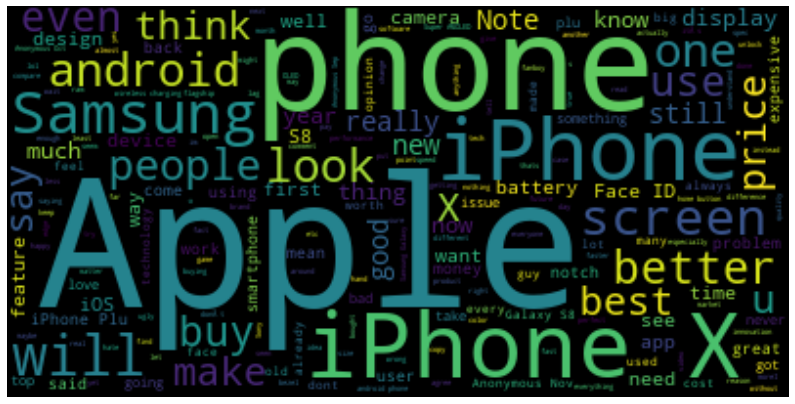

In [37]:
#creating the canvas

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

#Plotting the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('Off')
plt.show()

In [38]:
#to add more words to the list of stopwords

stopwords.add('phone')
stopwords.add('iphone')

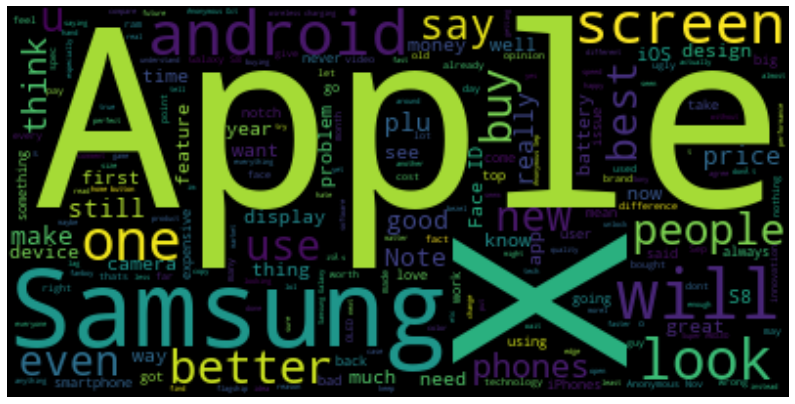

In [39]:
#Alternatively generating the wordcloud first

wordcloud.generate(word_string)

#Now displaying the cloud

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') #NO need of labels
plt.show()

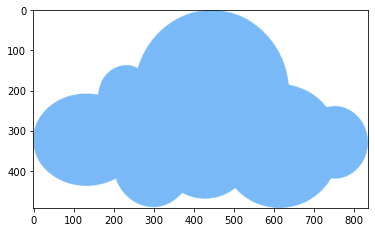

In [40]:
#To change the shape of cloud

#importing necessary libraries

from skimage.io import imread
from skimage import data_dir

#reading an image to set the custom outline of wordcloud

cloud = imread('cloud.png')
plt.imshow(cloud)

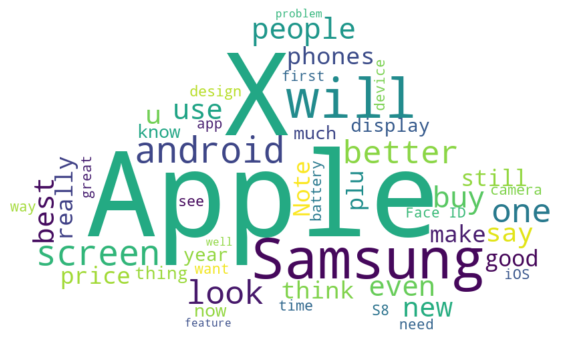

In [41]:
#plotting the custom wordcloud

wc1 = WordCloud(stopwords=stopwords,max_words=50,background_color='white',mask=cloud)
wc1.generate(word_string)
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(16)
plt.imshow(wc1, interpolation='bilinear')
plt.axis('off')
plt.show()

### Network graph

In [42]:
#importing libraries

import networkx as nx
import plotly as py
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

df_nodes = pd.read_csv('StackNetworkNodes.csv')
df_edges = pd.read_csv('StackNetworkLinks.csv')
G = nx.Graph(day="Stackoverflow")

In [43]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'])

for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'],row['target'],row['value'])])

In [44]:
pos = nx.spring_layout(G, k=0.25, iterations=50)
for n, p in pos.items():
    G.nodes[n]['pos']=p

In [45]:
#Adding edge to the plot

edge_trace = go.Scatter(x=[],y=[],
                       line=dict(width=0.5,color='#888'),hoverinfo='none',mode='lines')
for edge in G.edges():
    x0,y0 = G.nodes[edge[0]]['pos']
    x1,y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0,x1,None])
    edge_trace['y'] += tuple([y0,y1, None])
    
#Adding the nodes to the plot
node_trace = go.Scatter(x=[],y=[],text=[],mode='markers',hoverinfo='text',
                        marker=dict(showscale=True,colorscale='RdBu',
                                    reversescale=True,size=15,color=[],
                                    colorbar=dict(thickness=10, title='Node Connections',
                                                  xanchor='left',titleside='right'),line=dict(width=0)))

for node in G.nodes():
    x,y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [46]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    #print(adjacencies[0])
    node_info = adjacencies[0] + ' # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [47]:
fig = go.Figure(data=[edge_trace,node_trace],
               layout=go.Layout(title='<br>Concept Network graph',
                               titlefont=dict(size=16),showlegend=False,hovermode='closest',
                                margin=dict(b=20,l=5,r=5,t=40),annotations=[dict(text="",showarrow=False,xref="paper",yref="paper")],
                               xaxis=dict(showgrid=False,zeroline=False,showticklabels=False),
                               yaxis=dict(showgrid=False,zeroline=False,showticklabels=False)))

#plotting the graph
iplot(fig)